<a href="https://colab.research.google.com/github/VitorMazziero/Princ-pios-de-Bioprocessos/blob/main/Batelada_Simula%C3%A7%C3%A3o_do_ac%C3%BAmulo_celular_(%CE%BC_constante).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Batelada Simples


##Balanço de Massa Celular

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral é simplificado para: 


> Acúmulo $=$ Geração

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> ⠀⠀⠀$\frac{\mathrm{dm_{x}} }{\mathrm{d} t} = R_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (1)

---
Na qual: **Variação mássica celular = $\frac{\mathrm{dm_{x}} }{\mathrm{d} t}$** e **Geração mássica celular = $R_{x}$**

---

Substituindo massa $m_{x}$ pela concentração celular $C_{x}$ utilizando a relação $C_{x}=\frac{m_{x}}{V}$, a geração celular passa a ser descrita por $r_{x}=\frac{R_{x}}{V}$. Como na batelada simples não há variação de volume no biorreator, $\frac{\mathrm{dC_{x}V} }{\mathrm{d} t}\Rightarrow V\frac{\mathrm{dC_{x}} }{\mathrm{d} t}$. 
⠀

⠀⠀⠀

Assim, a variação da concentração celular com o tempo é descrita pela Eq. (2):

$\frac{\mathrm{dC_{x}V} }{\mathrm{d} t} = R_{x}\Rightarrow V\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =r_{x}V$

⠀⠀⠀⠀⠀⠀$\therefore$
> $\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =r_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (2)






Uitlizando a relação para reações de primeira ordem:

$r_{x}=\frac{\mathrm{d}[C] }{\mathrm{d} t} = k[C]^{1}$ 

---

Na qual: $[C]^{1} = C_{x}$ e $k=\mu$ 

---


Chega-se na relação final para a variação da concentração celular:


> $\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\mu C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (3)



Assim, é definida a função para integração numérica ***C_Var*** que descreve a variação de Cx com o tempo

In [ ]:
def C_Var(Cx, t, μ):
    dCxdt = μ*Cx #Eq. (3)
    return dCxdt

Rearranjando e integrando a Eq. (3):

$\frac{1}{C_{x}}\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\mu
\mathrm{d}t\Rightarrow\int_{C_{0}}^{C}\frac{1}{C_{x}}\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\int_{t_{0}}^{t}\mu
\mathrm{d}t $ 

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$
⠀
> $ln(C_{x}-C_{0})=\mu (t-t_{0})$⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (4)

---
Na qual: **Tempo Inicial** $= t_{0}$ e **Concentração inicial** $= C_{0}$ ⠀⠀⠀

---

In [11]:
import numpy as np
from numpy import arange
# Condições iniciais
Cx0 = 1
# Vetor tempo
t=np.arange(0, 12.5, 0.1) #Variação do tempo
print(t)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4]


Aplicando exponencial à Eq. (4) chega-se na relação final dada pela Eq. (5):

> $C_{x}=C_{0}+e^{\mu (t-t_{0})}$



##Simulação da variação da concentração celular

In [12]:
import numpy as np
from numpy import arange

# Condições iniciais
Cx0 = 1

# Vetor tempo
t=np.arange(0,12.5, 0.1) # Variação do tempo

In [4]:
def C_Var(Cx, t, μ):
    dCxdt = μ*Cx #Eq. (3)
    return dCxdt

mi = 0.1 # Valor inicial de μ

Criação do loop que permite a alteração das condições iniciais e geração do gráfico

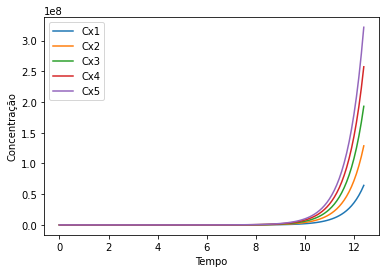

In [13]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Contadores
x = 0
p = 5 # Número de condições iniciais

while (x < p): 
    Result = odeint(C_Var, Cx0, t, args=(mi, ))
    Cx0+=1 #Variação da concentração inicial
    mi=mi+0.0 #Variação de μ 
    plt.plot(t, Result, label='Cx' + str(x+1))
    #print ('Cx' + str(x) + str(Result))
    x+=1

plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()